# 碰撞检测

In [238]:
import numpy as np

def get_corners(rect):
    """获取矩形的四个顶点坐标"""
    cx, cy, w, h, angle = rect
    angle = angle
    cos_a = np.cos(angle)
    sin_a = np.sin(angle)
    
    dx = w / 2
    dy = h / 2
    
    # 矩形的四个顶点
    corners = [
        (cx - dx * cos_a + dy * sin_a, cy - dx * sin_a - dy * cos_a),  # top-left
        (cx + dx * cos_a + dy * sin_a, cy + dx * sin_a - dy * cos_a),  # top-right
        (cx + dx * cos_a - dy * sin_a, cy + dx * sin_a + dy * cos_a),  # bottom-right
        (cx - dx * cos_a - dy * sin_a, cy - dx * sin_a + dy * cos_a)   # bottom-left
    ]
    return corners

def project_polygon(axis, corners):
    """将多边形投影到轴上并返回最小和最大投影"""
    dots = [np.dot(axis, corner) for corner in corners]
    return min(dots), max(dots)

def is_separating_axis(axis, corners1, corners2):
    """检查是否存在分离轴"""
    min1, max1 = project_polygon(axis, corners1)
    min2, max2 = project_polygon(axis, corners2)
    return max1 < min2 or max2 < min1

def check_collision(rect1, rect2):
    """使用SAT检测两个旋转矩形是否碰撞"""
    corners1 = get_corners(rect1)
    corners2 = get_corners(rect2)
    
    # 矩形1和矩形2的边
    edges = [
        np.subtract(corners1[1], corners1[0]),
        np.subtract(corners1[1], corners1[2]),
        np.subtract(corners2[1], corners2[0]),
        np.subtract(corners2[1], corners2[2])
    ]
    
    # 检查每条边的法向量作为分离轴
    for edge in edges:
        axis = np.array([-edge[1], edge[0]])  # 计算法向量
        if is_separating_axis(axis, corners1, corners2):
            return False  # 找到分离轴，矩形不碰撞
    
    return True  # 没有分离轴，矩形碰撞

# 示例矩形
rect1 = (2.5, 2.5, 3, 2, 30)  # 中心 (2.5, 2.5)，宽3，高2，旋转30度
rect2 = (4.5, 2.5, 2, 2, -30) # 中心 (4.5, 2.5)，宽2，高2，旋转-30度

collision = check_collision(rect1, rect2)
print("Collision:", collision)  # 输出: True or False depending on the collision status


Collision: True


# 检测碰撞时间

In [294]:
dragon_body_rectheader =  dragon_head_rect(Mind_x[0],Mind_y[0],theta_list[0])
dragon_body_rectheader

(2.2874372935365734, 0.6444128951979451, 3.41, 0.3, 1.811455075229012)

In [327]:
for i in range(len(Mind_x)-2 ): #len(Mind_x)-2 全部检测 #检测前40
    if check_collision(dragon_body_rectheader,dragon_body_rect(Mind_x[i+2],Mind_y[i+2],theta_list[i+2])):
        print(f"龙头与{i+2}节点相碰撞")
        break
    else:
        print(f"时间{dot}未碰撞")

时间413未碰撞
时间413未碰撞
时间413未碰撞
龙头与5节点相碰撞


In [303]:
for i in range(50):
    dot = 450 - i

    Mind_x = Mind_point_x.loc[dot].values
    Mind_y = Mind_point_y.loc[dot].values

    points_x_1 = points_x.loc[dot].values
    points_y_1 = points_y.loc[dot].values
    theta_list = theta_lists.loc[dot].values

    dragon_body_rectheader =  dragon_head_rect(Mind_x[0],Mind_y[0],theta_list[0])

    for i in range(len(Mind_x)-2 ): #len(Mind_x)-2 全部检测 #检测前40
        if check_collision(dragon_body_rectheader,dragon_body_rect(Mind_x[i+2],Mind_y[i+2],theta_list[i+2])):
            print(f"---->时间{dot}龙头与{i+2}节点相碰撞<----")
            break
        else:
            print(f"时间{dot}龙头与{i+2}节点未碰撞")

---->时间450龙头与2节点相碰撞<----
时间449龙头与2节点未碰撞
时间449龙头与3节点未碰撞
时间449龙头与4节点未碰撞
时间449龙头与5节点未碰撞
时间449龙头与6节点未碰撞
时间449龙头与7节点未碰撞
时间449龙头与8节点未碰撞
---->时间449龙头与9节点相碰撞<----
---->时间448龙头与2节点相碰撞<----
时间447龙头与2节点未碰撞
时间447龙头与3节点未碰撞
时间447龙头与4节点未碰撞
时间447龙头与5节点未碰撞
时间447龙头与6节点未碰撞
时间447龙头与7节点未碰撞
时间447龙头与8节点未碰撞
时间447龙头与9节点未碰撞
时间447龙头与10节点未碰撞
时间447龙头与11节点未碰撞
---->时间447龙头与12节点相碰撞<----
时间446龙头与2节点未碰撞
时间446龙头与3节点未碰撞
时间446龙头与4节点未碰撞
时间446龙头与5节点未碰撞
时间446龙头与6节点未碰撞
时间446龙头与7节点未碰撞
时间446龙头与8节点未碰撞
时间446龙头与9节点未碰撞
时间446龙头与10节点未碰撞
时间446龙头与11节点未碰撞
时间446龙头与12节点未碰撞
时间446龙头与13节点未碰撞
时间446龙头与14节点未碰撞
时间446龙头与15节点未碰撞
时间446龙头与16节点未碰撞
时间446龙头与17节点未碰撞
时间446龙头与18节点未碰撞
时间446龙头与19节点未碰撞
时间446龙头与20节点未碰撞
时间446龙头与21节点未碰撞
时间446龙头与22节点未碰撞
时间446龙头与23节点未碰撞
时间446龙头与24节点未碰撞
时间446龙头与25节点未碰撞
时间446龙头与26节点未碰撞
时间446龙头与27节点未碰撞
时间446龙头与28节点未碰撞
时间446龙头与29节点未碰撞
时间446龙头与30节点未碰撞
时间446龙头与31节点未碰撞
时间446龙头与32节点未碰撞
时间446龙头与33节点未碰撞
时间446龙头与34节点未碰撞
时间446龙头与35节点未碰撞
时间446龙头与36节点未碰撞
时间446龙头与37节点未碰撞
时间446龙头与38节点未碰撞
时间446龙头与39节点未碰撞
时间446龙头与40节点未碰撞
时间446龙头与41节点未碰撞
时间446龙头与42

时间443龙头与201节点未碰撞
时间443龙头与202节点未碰撞
时间443龙头与203节点未碰撞
时间443龙头与204节点未碰撞
时间443龙头与205节点未碰撞
时间443龙头与206节点未碰撞
时间443龙头与207节点未碰撞
时间443龙头与208节点未碰撞
时间443龙头与209节点未碰撞
时间443龙头与210节点未碰撞
时间443龙头与211节点未碰撞
时间443龙头与212节点未碰撞
时间443龙头与213节点未碰撞
时间443龙头与214节点未碰撞
时间443龙头与215节点未碰撞
时间443龙头与216节点未碰撞
时间443龙头与217节点未碰撞
时间443龙头与218节点未碰撞
时间443龙头与219节点未碰撞
时间443龙头与220节点未碰撞
时间443龙头与221节点未碰撞
时间443龙头与222节点未碰撞
时间442龙头与2节点未碰撞
时间442龙头与3节点未碰撞
时间442龙头与4节点未碰撞
时间442龙头与5节点未碰撞
时间442龙头与6节点未碰撞
时间442龙头与7节点未碰撞
时间442龙头与8节点未碰撞
时间442龙头与9节点未碰撞
时间442龙头与10节点未碰撞
时间442龙头与11节点未碰撞
时间442龙头与12节点未碰撞
时间442龙头与13节点未碰撞
时间442龙头与14节点未碰撞
时间442龙头与15节点未碰撞
时间442龙头与16节点未碰撞
时间442龙头与17节点未碰撞
时间442龙头与18节点未碰撞
时间442龙头与19节点未碰撞
时间442龙头与20节点未碰撞
时间442龙头与21节点未碰撞
时间442龙头与22节点未碰撞
时间442龙头与23节点未碰撞
时间442龙头与24节点未碰撞
时间442龙头与25节点未碰撞
时间442龙头与26节点未碰撞
时间442龙头与27节点未碰撞
时间442龙头与28节点未碰撞
时间442龙头与29节点未碰撞
时间442龙头与30节点未碰撞
时间442龙头与31节点未碰撞
时间442龙头与32节点未碰撞
时间442龙头与33节点未碰撞
时间442龙头与34节点未碰撞
时间442龙头与35节点未碰撞
时间442龙头与36节点未碰撞
时间442龙头与37节点未碰撞
时间442龙头与38节点未碰撞
时间442龙头与39节点未碰撞
时间442龙头与40节点未碰撞
时间442龙头与41

时间411龙头与104节点未碰撞
时间411龙头与105节点未碰撞
时间411龙头与106节点未碰撞
时间411龙头与107节点未碰撞
时间411龙头与108节点未碰撞
时间411龙头与109节点未碰撞
时间411龙头与110节点未碰撞
时间411龙头与111节点未碰撞
时间411龙头与112节点未碰撞
时间411龙头与113节点未碰撞
时间411龙头与114节点未碰撞
时间411龙头与115节点未碰撞
时间411龙头与116节点未碰撞
时间411龙头与117节点未碰撞
时间411龙头与118节点未碰撞
时间411龙头与119节点未碰撞
时间411龙头与120节点未碰撞
时间411龙头与121节点未碰撞
时间411龙头与122节点未碰撞
时间411龙头与123节点未碰撞
时间411龙头与124节点未碰撞
时间411龙头与125节点未碰撞
时间411龙头与126节点未碰撞
时间411龙头与127节点未碰撞
时间411龙头与128节点未碰撞
时间411龙头与129节点未碰撞
时间411龙头与130节点未碰撞
时间411龙头与131节点未碰撞
时间411龙头与132节点未碰撞
时间411龙头与133节点未碰撞
时间411龙头与134节点未碰撞
时间411龙头与135节点未碰撞
时间411龙头与136节点未碰撞
时间411龙头与137节点未碰撞
时间411龙头与138节点未碰撞
时间411龙头与139节点未碰撞
时间411龙头与140节点未碰撞
时间411龙头与141节点未碰撞
时间411龙头与142节点未碰撞
时间411龙头与143节点未碰撞
时间411龙头与144节点未碰撞
时间411龙头与145节点未碰撞
时间411龙头与146节点未碰撞
时间411龙头与147节点未碰撞
时间411龙头与148节点未碰撞
时间411龙头与149节点未碰撞
时间411龙头与150节点未碰撞
时间411龙头与151节点未碰撞
时间411龙头与152节点未碰撞
时间411龙头与153节点未碰撞
时间411龙头与154节点未碰撞
时间411龙头与155节点未碰撞
时间411龙头与156节点未碰撞
时间411龙头与157节点未碰撞
时间411龙头与158节点未碰撞
时间411龙头与159节点未碰撞
时间411龙头与160节点未碰撞
时间411龙头与161节点未碰撞
时间411龙头与162节点未

时间404龙头与60节点未碰撞
时间404龙头与61节点未碰撞
时间404龙头与62节点未碰撞
时间404龙头与63节点未碰撞
时间404龙头与64节点未碰撞
时间404龙头与65节点未碰撞
时间404龙头与66节点未碰撞
时间404龙头与67节点未碰撞
时间404龙头与68节点未碰撞
时间404龙头与69节点未碰撞
时间404龙头与70节点未碰撞
时间404龙头与71节点未碰撞
时间404龙头与72节点未碰撞
时间404龙头与73节点未碰撞
时间404龙头与74节点未碰撞
时间404龙头与75节点未碰撞
时间404龙头与76节点未碰撞
时间404龙头与77节点未碰撞
时间404龙头与78节点未碰撞
时间404龙头与79节点未碰撞
时间404龙头与80节点未碰撞
时间404龙头与81节点未碰撞
时间404龙头与82节点未碰撞
时间404龙头与83节点未碰撞
时间404龙头与84节点未碰撞
时间404龙头与85节点未碰撞
时间404龙头与86节点未碰撞
时间404龙头与87节点未碰撞
时间404龙头与88节点未碰撞
时间404龙头与89节点未碰撞
时间404龙头与90节点未碰撞
时间404龙头与91节点未碰撞
时间404龙头与92节点未碰撞
时间404龙头与93节点未碰撞
时间404龙头与94节点未碰撞
时间404龙头与95节点未碰撞
时间404龙头与96节点未碰撞
时间404龙头与97节点未碰撞
时间404龙头与98节点未碰撞
时间404龙头与99节点未碰撞
时间404龙头与100节点未碰撞
时间404龙头与101节点未碰撞
时间404龙头与102节点未碰撞
时间404龙头与103节点未碰撞
时间404龙头与104节点未碰撞
时间404龙头与105节点未碰撞
时间404龙头与106节点未碰撞
时间404龙头与107节点未碰撞
时间404龙头与108节点未碰撞
时间404龙头与109节点未碰撞
时间404龙头与110节点未碰撞
时间404龙头与111节点未碰撞
时间404龙头与112节点未碰撞
时间404龙头与113节点未碰撞
时间404龙头与114节点未碰撞
时间404龙头与115节点未碰撞
时间404龙头与116节点未碰撞
时间404龙头与117节点未碰撞
时间404龙头与118节点未碰撞
时间404龙头与119节点未碰撞
时间404龙头与120节点未碰撞
时间4

In [328]:
# 初始化变量来存储最小的碰撞时间和对应的碰撞节点
min_collision_time = None
collision_node = None

for i in range(50):
    dot = 450 - i

    Mind_x = Mind_point_x.loc[dot].values
    Mind_y = Mind_point_y.loc[dot].values

    points_x_1 = points_x.loc[dot].values
    points_y_1 = points_y.loc[dot].values
    theta_list = theta_lists.loc[dot].values

    dragon_body_rectheader =  dragon_head_rect(Mind_x[0],Mind_y[0],theta_list[0])

    for i in range(len(Mind_x)-2 ): #len(Mind_x)-2 全部检测 #检测前40
        if check_collision(dragon_body_rectheader,dragon_body_rect(Mind_x[i+2],Mind_y[i+2],theta_list[i+2])):
            print(f"---->时间 {dot} 龙头与 {j+2} 节点相碰撞<----")
            if min_collision_time is None or dot < min_collision_time:
                min_collision_time = dot  # 记录最小的碰撞时间
                collision_node = i + 2  # 记录对应的碰撞节点
            break
#         else:
#             print(f"时间 {dot} 龙头与 {j+2} 节点未碰撞")

if min_collision_time is not None:
    print(f"最早的碰撞时间为：{min_collision_time}，对应的碰撞节点为：{collision_node}对应的碰撞半径为{points.loc[min_collision_time][1]}")
else:
    print("未检测到碰撞。")


---->时间 450 龙头与 452 节点相碰撞<----
---->时间 449 龙头与 452 节点相碰撞<----
---->时间 448 龙头与 452 节点相碰撞<----
---->时间 447 龙头与 452 节点相碰撞<----
---->时间 440 龙头与 452 节点相碰撞<----
---->时间 439 龙头与 452 节点相碰撞<----
---->时间 438 龙头与 452 节点相碰撞<----
---->时间 437 龙头与 452 节点相碰撞<----
---->时间 436 龙头与 452 节点相碰撞<----
---->时间 435 龙头与 452 节点相碰撞<----
---->时间 434 龙头与 452 节点相碰撞<----
---->时间 433 龙头与 452 节点相碰撞<----
---->时间 432 龙头与 452 节点相碰撞<----
---->时间 430 龙头与 452 节点相碰撞<----
---->时间 429 龙头与 452 节点相碰撞<----
---->时间 428 龙头与 452 节点相碰撞<----
---->时间 427 龙头与 452 节点相碰撞<----
---->时间 426 龙头与 452 节点相碰撞<----
---->时间 425 龙头与 452 节点相碰撞<----
---->时间 424 龙头与 452 节点相碰撞<----
---->时间 423 龙头与 452 节点相碰撞<----
---->时间 422 龙头与 452 节点相碰撞<----
---->时间 421 龙头与 452 节点相碰撞<----
---->时间 420 龙头与 452 节点相碰撞<----
---->时间 419 龙头与 452 节点相碰撞<----
---->时间 418 龙头与 452 节点相碰撞<----
---->时间 417 龙头与 452 节点相碰撞<----
---->时间 416 龙头与 452 节点相碰撞<----
---->时间 415 龙头与 452 节点相碰撞<----
---->时间 414 龙头与 452 节点相碰撞<----
---->时间 413 龙头与 452 节点相碰撞<----
最早的碰撞时间为：413，对应的碰撞节点为：8对应的碰撞半径为(1.56555

In [324]:
dot = 413

Mind_x = Mind_point_x.loc[dot].values
Mind_y = Mind_point_y.loc[dot].values

points_x_1 = points_x.loc[dot].values
points_y_1 = points_y.loc[dot].values
theta_list = theta_lists.loc[dot].values

In [ ]:
# 创建图形
fig, ax = plt.subplots(figsize=(12, 12))

# 矩形定义
draw_rectangle(ax, dragon_head_rect(Mind_x[0],Mind_y[0],theta_list[0]), 'r', 'header')
plt.scatter(points_x_1[0], points_y_1[0], color='red', label='header Points',s=2,marker='v')
for i in range(len(theta_list)-2): #
    draw_rectangle(ax, dragon_body_rect(Mind_x[i+1],Mind_y[i+1],theta_list[i+1]), 'b')
    plt.scatter(points_x_1[i+1], points_y_1[i+1], color='blue',s=0.2)# label='Scatter Points'
    
# draw_rectangle(ax, rect3, 'g', 'Rectangle 3')

# 设置坐标轴范围
ax.set_xlim(-12, )
ax.set_ylim(-12, 12)

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')

# 添加图例
ax.legend()

# 显示图像
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### 

# 生成板凳龙矩形

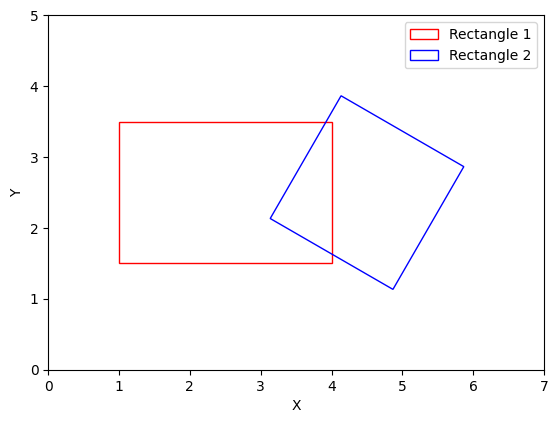

In [216]:
import numpy as np
import matplotlib.pyplot as plt

# 获取矩形顶点
def get_corners(rect):
    cx, cy, w, h, angle = rect
    angle = angle #np.deg2rad(angle)
    cos_a = np.cos(angle)
    sin_a = np.sin(angle)
    
    dx = w / 2
    dy = h / 2
    
    corners = [
        (cx - dx * cos_a + dy * sin_a, cy - dx * sin_a - dy * cos_a),  # top-left
        (cx + dx * cos_a + dy * sin_a, cy + dx * sin_a - dy * cos_a),  # top-right
        (cx + dx * cos_a - dy * sin_a, cy + dx * sin_a + dy * cos_a),  # bottom-right
        (cx - dx * cos_a - dy * sin_a, cy - dx * sin_a + dy * cos_a)   # bottom-left
    ]
    return corners

# # 绘制矩形
# def draw_rectangle(ax, rect, color, label):
#     corners = get_corners(rect)
#     polygon = plt.Polygon(corners, closed=True, edgecolor=color, facecolor='none', linewidth=2, label=label)
#     ax.add_patch(polygon)

def draw_rectangle(ax, rect, color, label=""):
    corners = get_corners(rect)
    polygon = plt.Polygon(corners, closed=True, edgecolor=color, facecolor='none', linewidth=1)
    
    # 仅当 label 不为空时设置标签
    if label:
        polygon.set_label(label)
    
    ax.add_patch(polygon)

# 矩形定义
rect1 = (2.5, 2.5, 3, 2, 0)  # 中心 (2.5, 2.5)，宽3，高2，旋转30度
rect2 = (4.5, 2.5, 2, 2, np.pi/3) # 中心 (4.5, 2.5)，宽2，高2，旋转-30度

# 创建图形
fig, ax = plt.subplots()

# 绘制矩形
draw_rectangle(ax, rect1, 'r', 'Rectangle 1')
draw_rectangle(ax, rect2, 'b', 'Rectangle 2')
# draw_rectangle(ax, rect3, 'g', 'Rectangle 3')

# 设置坐标轴范围
ax.set_xlim(0, 7)
ax.set_ylim(0, 5)

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')

# 添加图例
ax.legend()

# 显示图像
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [115]:
Mind_point_x = pd.read_excel("x中点坐标.xlsx")
Mind_point_x = Mind_point_x.drop(["Unnamed: 0"],axis = 1)
Mind_point_y = pd.read_excel("y中点坐标.xlsx")
Mind_point_y = Mind_point_y.drop(["Unnamed: 0"],axis = 1)

In [116]:
Mind_point_x

,龙头中点坐标,第1节龙身中点坐标,第2节龙身中点坐标,第3节龙身中点坐标,第4节龙身中点坐标,第5节龙身中点坐标,第6节龙身中点坐标,第7节龙身中点坐标,第8节龙身中点坐标,第9节龙身中点坐标,...,第213节龙身中点坐标,第214节龙身中点坐标,第215节龙身中点坐标,第216节龙身中点坐标,第217节龙身中点坐标,第218节龙身中点坐标,第219节龙身中点坐标,第220节龙身中点坐标,第221节龙身中点坐标,第222节龙身中点坐标
0,8.581912,8.035339,7.243517,6.198318,4.936409,3.501732,1.943938,0.316623,-1.324530,-2.923667,...,-11.512378,-11.758566,-11.775692,-11.563658,-11.126815,-10.473856,-9.617631,-8.574871,-7.365852,-6.013983
1,8.676701,8.379221,7.754941,6.859211,5.723622,4.387887,2.898403,1.306595,-0.332889,-1.964070,...,-11.253902,-11.636765,-11.792801,-11.719202,-11.417632,-10.894176,-10.159195,-9.227108,-8.116092,-6.847709
2,8.659633,8.615345,8.166783,7.432112,6.437414,5.217641,3.815334,2.279080,0.661800,-0.981103,...,-10.914941,-11.431819,-11.725735,-11.791181,-11.627115,-11.236960,-10.628509,-9.813757,-8.808647,-7.632740
3,8.530808,8.740561,8.473667,7.909624,7.068640,5.980435,4.683129,3.221844,1.647092,0.013000,...,-10.497876,-11.145146,-11.574923,-11.779032,-11.753725,-11.499727,-11.022203,-10.330630,-9.438596,-8.363516
4,8.291776,8.753134,8.671541,8.285540,7.609175,6.666523,5.490772,4.122986,2.610618,1.005829,...,-10.005657,-10.778751,-11.341393,-11.682791,-11.796508,-11.680561,-11.337437,-10.774023,-10.001449,-9.034852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,-0.294455,-2.247175,-2.885133,-2.662692,-1.655403,-0.158844,1.408529,2.626007,3.180412,2.938471,...,0.442148,-1.198855,-2.797015,-4.290934,-5.623581,-6.744420,-7.611269,-8.191814,-8.464725,-8.420350
397,0.566032,-1.521588,-2.601420,-2.900550,-2.339042,-1.089733,0.488522,1.961744,2.940943,3.179377,...,1.416787,-0.219573,-1.850897,-3.414281,-4.849816,-6.102841,-7.125980,-7.880862,-8.339483,-8.485156
398,1.342683,-0.632187,-2.034898,-2.826478,-2.773192,-1.900935,-0.468818,1.119351,2.433933,3.133762,...,2.369464,0.760408,-0.881582,-2.492963,-4.011754,-5.379901,-6.545455,-7.464480,-8.102646,-8.436420
399,1.940459,0.318572,-1.247752,-2.447059,-2.911112,-2.509296,-1.369010,0.179006,1.705703,2.804763,...,3.286871,1.727400,0.097389,-1.539851,-3.121116,-4.585736,-5.877874,-6.948605,-7.757705,-8.275084


In [117]:
Mind_point_y

,龙头中点坐标,第1节龙身中点坐标,第2节龙身中点坐标,第3节龙身中点坐标,第4节龙身中点坐标,第5节龙身中点坐标,第6节龙身中点坐标,第7节龙身中点坐标,第8节龙身中点坐标,第9节龙身中点坐标,...,第213节龙身中点坐标,第214节龙身中点坐标,第215节龙身中点坐标,第216节龙身中点坐标,第217节龙身中点坐标,第218节龙身中点坐标,第219节龙身中点坐标,第220节龙身中点坐标,第221节龙身中点坐标,第222节龙身中点坐标
0,1.413272,3.583328,5.022713,6.290175,7.342111,8.142596,8.664547,8.890572,8.813479,8.436422,...,2.485024,0.857569,-0.788321,-2.420594,-4.007563,-5.518514,-6.924300,-8.197891,-9.314889,-10.253976
1,0.431696,2.649627,4.169177,5.546317,6.733486,7.689954,8.383166,8.789783,8.896400,8.699910,...,3.447453,1.846635,0.208074,-1.436262,-3.054391,-4.614938,-6.087739,-7.444419,-8.658929,-9.708036
2,-0.554268,1.683047,3.263394,4.732765,6.040227,7.140737,7.996650,8.578941,8.868130,8.854852,...,4.384562,2.821864,1.202350,-0.442326,-2.080114,-3.679200,-5.208615,-6.638835,-7.942342,-9.094143
3,-1.531896,0.695965,2.316897,3.859815,5.271046,6.501788,7.509756,8.260576,8.728903,8.899200,...,5.289610,3.776266,2.187402,0.554134,-1.091652,-2.717925,-4.293132,-5.786806,-7.170148,-8.416579
4,-2.488532,-0.298936,1.341778,2.938553,4.435651,5.781114,6.928528,7.838581,8.480348,8.832282,...,6.156076,4.702984,3.156176,1.546003,-0.096039,-1.737934,-3.347765,-4.894336,-6.347772,-7.680086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,2.502582,1.752746,0.300769,-1.271590,-2.501763,-3.044034,-2.756723,-1.726143,-0.228862,1.350785,...,8.330433,8.273069,7.896009,7.214392,6.254935,5.054799,3.660064,2.123906,0.504512,-1.137149
397,2.419521,2.373152,1.213387,-0.344959,-1.831240,-2.815901,-3.028254,-2.419215,-1.159251,0.420068,...,8.210449,8.346249,8.159141,7.656984,6.859688,5.798334,4.513874,3.055482,1.478610,-0.157158
398,2.048576,2.715279,1.980980,0.607188,-0.979542,-2.308435,-3.002474,-2.876424,-1.973513,-0.538755,...,7.976951,8.304048,8.309486,7.993698,7.369478,6.461374,5.304623,3.943710,2.430587,0.822640
399,1.435000,2.737956,2.516701,1.481624,-0.035378,-1.572149,-2.680729,-3.052971,-2.595252,-1.438766,...,7.633490,8.147336,8.345228,8.220128,7.777506,7.035005,6.021642,4.776586,3.347569,1.788994


In [130]:
def dragon_head_rect(x,y,angle):
    dragon_head = (x,y,3.41,0.3,angle)
    return dragon_head
def dragon_body_rect(x,y,angle):
    dragon_body = (x,y,2.2,0.3,angle)
    return dragon_body

In [131]:
print(dragon_head_rect(1,1,np.pi/3))

(1, 1, 3.41, 0.3, 1.0471975511965976)


In [132]:
print(dragon_body_rect(1,2,np.pi/3))

(1, 2, 2.2, 0.3, 1.0471975511965976)


In [300]:
theta_lists = pd.read_excel("龙板凳对应的倾斜角.xlsx")
theta_lists = theta_lists.drop(["Unnamed: 0"],axis = 1)

In [301]:
theta_lists

,alpha_龙头,alpha_第1节龙身,alpha_第2节龙身,alpha_第3节龙身,alpha_第4节龙身,alpha_第5节龙身,alpha_第6节龙身,alpha_第7节龙身,alpha_第8节龙身,alpha_第9节龙身,...,alpha_第213节龙身,alpha_第214节龙身,alpha_第215节龙身,alpha_第216节龙身,alpha_第217节龙身,alpha_第218节龙身,alpha_第219节龙身,alpha_第220节龙身,alpha_第221节龙身,alpha_第222节龙身
0,1.723903,1.980310,2.167140,2.353623,2.539763,2.725562,2.911020,3.096141,0.139333,0.323783,...,1.350763,1.490563,1.630219,1.769729,1.909096,2.048320,2.187400,2.326338,2.465134,2.603787
1,1.610388,1.867086,2.054126,2.240818,2.427166,2.613171,2.798835,2.984160,0.027555,0.212207,...,1.266096,1.405984,1.545727,1.685325,1.824779,1.964089,2.103256,2.242280,2.381162,2.519901
2,1.496745,1.753735,1.940985,2.127887,2.314443,2.500655,2.686525,2.872055,3.057247,0.100509,...,1.181375,1.321351,1.461182,1.600868,1.740409,1.879806,2.019060,2.158170,2.297138,2.435963
3,1.382973,1.640256,1.827717,2.014830,2.201595,2.388015,2.574092,2.759827,2.945223,3.130282,...,1.096602,1.236666,1.376584,1.516358,1.655986,1.795471,1.934811,2.074008,2.213062,2.351974
4,1.269073,1.526649,1.714322,1.901645,2.088621,2.275249,2.461534,2.647475,2.833077,3.018339,...,1.011775,1.151927,1.291934,1.431795,1.571511,1.711083,1.850510,1.989794,2.128935,2.267932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,1.336932,0.038914,0.612342,1.175890,1.730057,2.275300,2.812039,0.199073,0.719944,1.233396,...,2.788190,2.985746,0.041301,0.238042,0.434380,0.630317,0.825856,1.020999,1.215748,1.410106
447,0.649632,2.355683,2.943948,0.379961,0.947471,1.505402,2.054228,2.594383,3.126269,0.508665,...,2.509457,2.707592,2.905315,3.102628,0.157942,0.354444,0.550545,0.746245,0.941549,1.136458
448,2.901873,2.698298,2.410524,0.350587,2.751710,0.777331,2.047868,0.317062,1.938354,0.833546,...,2.300232,2.512888,2.725035,2.936676,0.006223,0.216863,0.427009,0.636663,0.845829,1.054511
449,1.629851,0.463932,1.255724,2.021777,2.764488,0.344309,1.046184,1.730047,2.397237,3.048930,...,0.106529,0.309801,0.512628,0.715013,0.916959,1.118469,1.319546,1.520192,1.720410,1.920203


In [149]:
import pandas as pd
points_x = pd.read_excel("板凳龙x坐标.xlsx")
points_x = points_x.drop(["Unnamed: 0"],axis = 1)
points_y = pd.read_excel("板凳龙y坐标.xlsx")
points_y = points_y.drop(["Unnamed: 0"],axis = 1)

In [215]:
# 绘制矩形
# 获取矩形顶点
def get_corners(rect):
    cx, cy, w, h, angle = rect
    angle = angle #np.deg2rad(angle)
    cos_a = np.cos(angle)
    sin_a = np.sin(angle)
    
    dx = w / 2
    dy = h / 2
    
    corners = [
        (cx - dx * cos_a + dy * sin_a, cy - dx * sin_a - dy * cos_a),  # top-left
        (cx + dx * cos_a + dy * sin_a, cy + dx * sin_a - dy * cos_a),  # top-right
        (cx + dx * cos_a - dy * sin_a, cy + dx * sin_a + dy * cos_a),  # bottom-right
        (cx - dx * cos_a - dy * sin_a, cy - dx * sin_a + dy * cos_a)   # bottom-left
    ]
    return corners
def draw_rectangle(ax, rect, color, label=""):
    corners = get_corners(rect)
    polygon = plt.Polygon(corners, closed=True, edgecolor=color, facecolor='none', linewidth=0.2)
    
    # 仅当 label 不为空时设置标签
    if label:
        polygon.set_label(label)
    
    ax.add_patch(polygon)

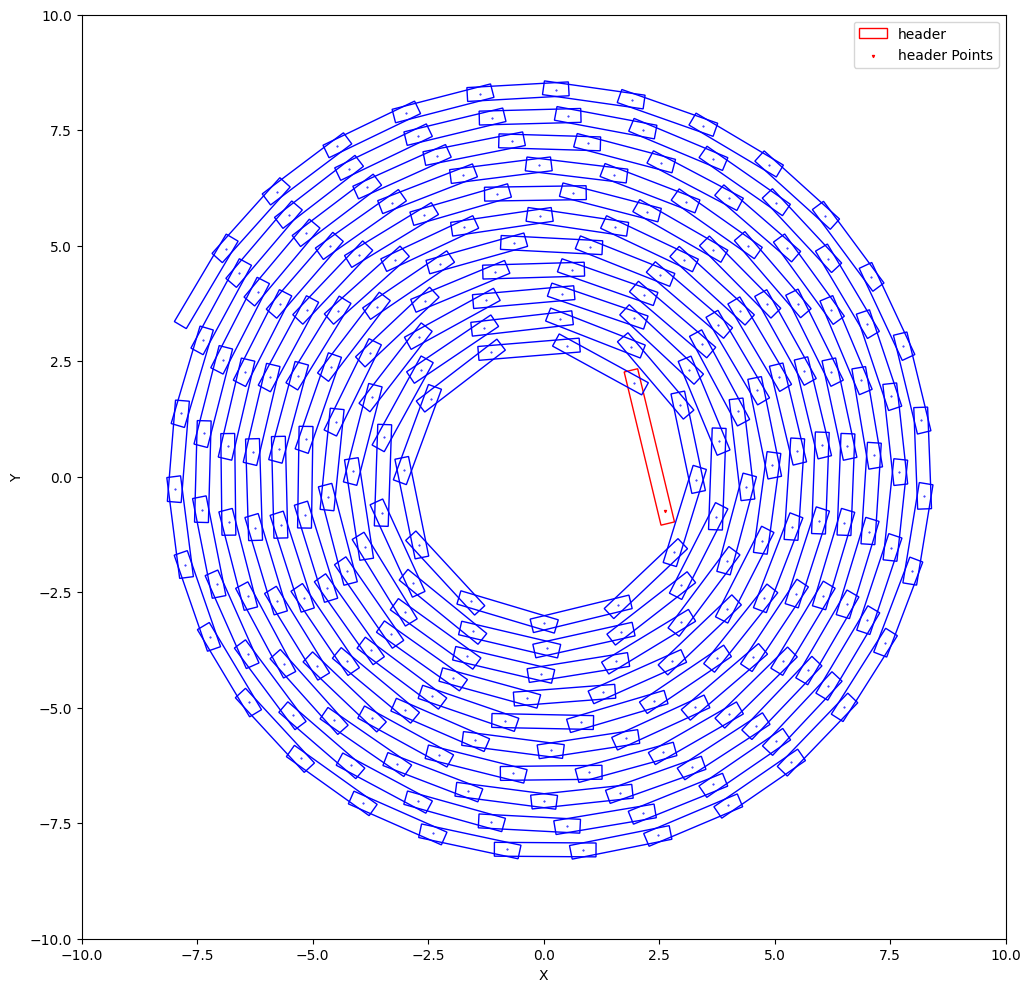

In [332]:
dot = 400

Mind_x = Mind_point_x.loc[dot].values
Mind_y = Mind_point_y.loc[dot].values

points_x_1 = points_x.loc[dot].values
points_y_1 = points_y.loc[dot].values
theta_list = theta_lists.loc[dot].values
# 创建图形
fig, ax = plt.subplots(figsize=(12, 12))

# 矩形定义
draw_rectangle(ax, dragon_head_rect(Mind_x[0],Mind_y[0],theta_list[0]), 'r', 'header')
plt.scatter(points_x_1[0], points_y_1[0], color='red', label='header Points',s=2,marker='v')
for i in range(len(theta_list)-2): #
    draw_rectangle(ax, dragon_body_rect(Mind_x[i+1],Mind_y[i+1],theta_list[i+1]), 'b')
    
    plt.scatter(points_x_1[i+1], points_y_1[i+1], color='blue',s=0.2)# label='Scatter Points'
    
# draw_rectangle(ax, rect3, 'g', 'Rectangle 3')

# 设置坐标轴范围
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')

# 添加图例
ax.legend()

# 显示图像
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# 求中点坐标

In [84]:
def mind_point(x1,x2,y1,y2):
    x = (x1+x2)/2
    y = (y1+y2)/2
    return x,y

In [44]:
# mind_point(8.8,8.363823851,-3.44861E-14,2.826543891)

(8.5819119255, 1.4132719454999827)

In [258]:
points = pd.read_excel("板凳龙坐标.xlsx")

In [259]:
names = points.columns
names

Index(['Unnamed: 0', '龙头坐标', 'alpha_第1节龙身', 'alpha_第2节龙身', 'alpha_第3节龙身',
       'alpha_第4节龙身', 'alpha_第5节龙身', 'alpha_第6节龙身', 'alpha_第7节龙身',
       'alpha_第8节龙身',
       ...
       'alpha_第213节龙身', 'alpha_第214节龙身', 'alpha_第215节龙身', 'alpha_第216节龙身',
       'alpha_第217节龙身', 'alpha_第218节龙身', 'alpha_第219节龙身', 'alpha_第220节龙身',
       'alpha_第221节龙身', 'alpha_第222节龙身'],
      dtype='object', length=224)

In [53]:
# x = points_x.loc[0].values
# y = points_y.loc[0].values

In [266]:
import pandas as pd
points_x = pd.read_excel("板凳龙x坐标.xlsx")
points_x = points_x.drop(["Unnamed: 0"],axis = 1)
points_y = pd.read_excel("板凳龙y坐标.xlsx")
points_y = points_y.drop(["Unnamed: 0"],axis = 1)

In [275]:
len(md_points_x)

223

In [281]:
names_mind

Index(['龙头中点坐标', '第1节龙身中点坐标', '第2节龙身中点坐标', '第3节龙身中点坐标', '第4节龙身中点坐标',
       '第5节龙身中点坐标', '第6节龙身中点坐标', '第7节龙身中点坐标', '第8节龙身中点坐标', '第9节龙身中点坐标',
       ...
       '第213节龙身中点坐标', '第214节龙身中点坐标', '第215节龙身中点坐标', '第216节龙身中点坐标',
       '第217节龙身中点坐标', '第218节龙身中点坐标', '第219节龙身中点坐标', '第220节龙身中点坐标',
       '第221节龙身中点坐标', '第222节龙身中点坐标'],
      dtype='object', length=223)

In [284]:
names_minda = ['龙头中点坐标', '第1节龙身中点坐标', '第2节龙身中点坐标', '第3节龙身中点坐标', '第4节龙身中点坐标', '第5节龙身中点坐标', '第6节龙身中点坐标', '第7节龙身中点坐标', '第8节龙身中点坐标', '第9节龙身中点坐标', '第10节龙身中点坐标', '第11节龙身中点坐标', '第12节龙身中点坐标', '第13节龙身中点坐标', '第14节龙身中点坐标', '第15节龙身中点坐标', '第16节龙身中点坐标', '第17节龙身中点坐标', '第18节龙身中点坐标', '第19节龙身中点坐标', '第20节龙身中点坐标', '第21节龙身中点坐标', '第22节龙身中点坐标', '第23节龙身中点坐标', '第24节龙身中点坐标', '第25节龙身中点坐标', '第26节龙身中点坐标', '第27节龙身中点坐标', '第28节龙身中点坐标', '第29节龙身中点坐标', '第30节龙身中点坐标', '第31节龙身中点坐标', '第32节龙身中点坐标', '第33节龙身中点坐标', '第34节龙身中点坐标', '第35节龙身中点坐标', '第36节龙身中点坐标', '第37节龙身中点坐标', '第38节龙身中点坐标', '第39节龙身中点坐标', '第40节龙身中点坐标', '第41节龙身中点坐标', '第42节龙身中点坐标', '第43节龙身中点坐标', '第44节龙身中点坐标', '第45节龙身中点坐标', '第46节龙身中点坐标', '第47节龙身中点坐标', '第48节龙身中点坐标', '第49节龙身中点坐标', '第50节龙身中点坐标', '第51节龙身中点坐标', '第52节龙身中点坐标', '第53节龙身中点坐标', '第54节龙身中点坐标', '第55节龙身中点坐标', '第56节龙身中点坐标', '第57节龙身中点坐标', '第58节龙身中点坐标', '第59节龙身中点坐标', '第60节龙身中点坐标', '第61节龙身中点坐标', '第62节龙身中点坐标', '第63节龙身中点坐标', '第64节龙身中点坐标', '第65节龙身中点坐标', '第66节龙身中点坐标', '第67节龙身中点坐标', '第68节龙身中点坐标', '第69节龙身中点坐标', '第70节龙身中点坐标', '第71节龙身中点坐标', '第72节龙身中点坐标', '第73节龙身中点坐标', '第74节龙身中点坐标', '第75节龙身中点坐标', '第76节龙身中点坐标', '第77节龙身中点坐标', '第78节龙身中点坐标', '第79节龙身中点坐标', '第80节龙身中点坐标', '第81节龙身中点坐标', '第82节龙身中点坐标', '第83节龙身中点坐标', '第84节龙身中点坐标', '第85节龙身中点坐标', '第86节龙身中点坐标', '第87节龙身中点坐标', '第88节龙身中点坐标', '第89节龙身中点坐标', '第90节龙身中点坐标', '第91节龙身中点坐标', '第92节龙身中点坐标', '第93节龙身中点坐标', '第94节龙身中点坐标', '第95节龙身中点坐标', '第96节龙身中点坐标', '第97节龙身中点坐标', '第98节龙身中点坐标', '第99节龙身中点坐标', '第100节龙身中点坐标', '第101节龙身中点坐标', '第102节龙身中点坐标', '第103节龙身中点坐标', '第104节龙身中点坐标', '第105节龙身中点坐标', '第106节龙身中点坐标', '第107节龙身中点坐标', '第108节龙身中点坐标', '第109节龙身中点坐标', '第110节龙身中点坐标', '第111节龙身中点坐标', '第112节龙身中点坐标', '第113节龙身中点坐标', '第114节龙身中点坐标', '第115节龙身中点坐标', '第116节龙身中点坐标', '第117节龙身中点坐标', '第118节龙身中点坐标', '第119节龙身中点坐标', '第120节龙身中点坐标', '第121节龙身中点坐标', '第122节龙身中点坐标', '第123节龙身中点坐标', '第124节龙身中点坐标', '第125节龙身中点坐标', '第126节龙身中点坐标', '第127节龙身中点坐标', '第128节龙身中点坐标', '第129节龙身中点坐标', '第130节龙身中点坐标', '第131节龙身中点坐标', '第132节龙身中点坐标', '第133节龙身中点坐标', '第134节龙身中点坐标', '第135节龙身中点坐标', '第136节龙身中点坐标', '第137节龙身中点坐标', '第138节龙身中点坐标', '第139节龙身中点坐标', '第140节龙身中点坐标', '第141节龙身中点坐标', '第142节龙身中点坐标', '第143节龙身中点坐标', '第144节龙身中点坐标', '第145节龙身中点坐标', '第146节龙身中点坐标', '第147节龙身中点坐标', '第148节龙身中点坐标', '第149节龙身中点坐标', '第150节龙身中点坐标', '第151节龙身中点坐标', '第152节龙身中点坐标', '第153节龙身中点坐标', '第154节龙身中点坐标', '第155节龙身中点坐标', '第156节龙身中点坐标', '第157节龙身中点坐标', '第158节龙身中点坐标', '第159节龙身中点坐标', '第160节龙身中点坐标', '第161节龙身中点坐标', '第162节龙身中点坐标', '第163节龙身中点坐标', '第164节龙身中点坐标', '第165节龙身中点坐标', '第166节龙身中点坐标', '第167节龙身中点坐标', '第168节龙身中点坐标', '第169节龙身中点坐标', '第170节龙身中点坐标', '第171节龙身中点坐标', '第172节龙身中点坐标', '第173节龙身中点坐标', '第174节龙身中点坐标', '第175节龙身中点坐标', '第176节龙身中点坐标', '第177节龙身中点坐标', '第178节龙身中点坐标', '第179节龙身中点坐标', '第180节龙身中点坐标', '第181节龙身中点坐标', '第182节龙身中点坐标', '第183节龙身中点坐标', '第184节龙身中点坐标', '第185节龙身中点坐标', '第186节龙身中点坐标', '第187节龙身中点坐标', '第188节龙身中点坐标', '第189节龙身中点坐标', '第190节龙身中点坐标', '第191节龙身中点坐标', '第192节龙身中点坐标', '第193节龙身中点坐标', '第194节龙身中点坐标', '第195节龙身中点坐标', '第196节龙身中点坐标', '第197节龙身中点坐标', '第198节龙身中点坐标', '第199节龙身中点坐标', '第200节龙身中点坐标', '第201节龙身中点坐标', '第202节龙身中点坐标', '第203节龙身中点坐标', '第204节龙身中点坐标', '第205节龙身中点坐标', '第206节龙身中点坐标', '第207节龙身中点坐标', '第208节龙身中点坐标', '第209节龙身中点坐标', '第210节龙身中点坐标', '第211节龙身中点坐标', '第212节龙身中点坐标', '第213节龙身中点坐标', '第214节龙身中点坐标', '第215节龙身中点坐标', '第216节龙身中点坐标', '第217节龙身中点坐标', '第218节龙身中点坐标', '第219节龙身中点坐标', '第220节龙身中点坐标', '第221节龙身中点坐标', '第222节龙身中点坐标']

In [285]:
Mind_point_x = pd.DataFrame(columns=names_minda)
Mind_point_y = pd.DataFrame(columns=names_minda)
for j in range(points_x.shape[0]):
    x = points_x.loc[j].values
    y = points_y.loc[j].values
    # 初始化一个空列表来存储计算的角度
    md_points_x = []
    md_points_y = []
    # 计算每对点之间的倾斜角并添加到列表中
    for i in range(len(x) - 1):  # 注意这里使用 len(x) - 1，避免超出索引范围
        md_point= mind_point(x[i], x[i+1], y[i], y[i+1])
        md_points_x.append(md_point[0])
        md_points_y.append(md_point[1])
    Mind_point_x.loc[j] = md_points_x
    Mind_point_y.loc[j] = md_points_y

In [286]:
Mind_point_x.to_excel("x中点坐标.xlsx")
Mind_point_y.to_excel("y中点坐标.xlsx")

In [108]:
md_point[0]

-8.003664384944734

In [112]:
# Mind_point.to_excel("中点坐标.xlsx")

# 计算倾斜角

In [173]:
def slope_angle(x1, x2, y1, y2):
    # 计算 y 和 x 的差
    delta_y = y2 - y1
    delta_x = x2 - x1
    
    # 计算倾斜角，结果以弧度为单位
    theta = np.arctan2(delta_y, delta_x)
    
    # 将角度限制在 0 到 pi 之间
    if theta < 0:
        theta += np.pi
    elif theta > np.pi:
        theta -= np.pi
       
    return theta# theta_degrees

In [287]:
x =points_x.loc[0].values
y =points_y.loc[0].values
# 初始化一个空列表来存储计算的角度
theta_list = []
# 计算每对点之间的倾斜角并添加到列表中
for i in range(len(x) - 1):  # 注意这里使用 len(x) - 1，避免超出索引范围
    theta_degrees= slope_angle(x[i], x[i+1], y[i], y[i+1])
    theta_list.append(theta_degrees)

In [288]:
names = alphas.columns
names

Index(['alpha_龙头', 'alpha_第1节龙身', 'alpha_第2节龙身', 'alpha_第3节龙身', 'alpha_第4节龙身',
       'alpha_第5节龙身', 'alpha_第6节龙身', 'alpha_第7节龙身', 'alpha_第8节龙身',
       'alpha_第9节龙身',
       ...
       'alpha_第214节龙身', 'alpha_第215节龙身', 'alpha_第216节龙身', 'alpha_第217节龙身',
       'alpha_第218节龙身', 'alpha_第219节龙身', 'alpha_第220节龙身', 'alpha_第221节龙身',
       'alpha_第222节龙身', 'alpha_第223节龙身'],
      dtype='object', length=224)

In [289]:
the_alpha = pd.DataFrame(columns= names)
the_alpha = the_alpha.drop(["alpha_第223节龙身"],axis = 1)
the_alpha.shape

(0, 223)

In [290]:
the_alpha

,alpha_龙头,alpha_第1节龙身,alpha_第2节龙身,alpha_第3节龙身,alpha_第4节龙身,alpha_第5节龙身,alpha_第6节龙身,alpha_第7节龙身,alpha_第8节龙身,alpha_第9节龙身,...,alpha_第213节龙身,alpha_第214节龙身,alpha_第215节龙身,alpha_第216节龙身,alpha_第217节龙身,alpha_第218节龙身,alpha_第219节龙身,alpha_第220节龙身,alpha_第221节龙身,alpha_第222节龙身


In [291]:
for j in range(points_x.shape[0]):
    x =points_x.loc[j].values
    y =points_y.loc[j].values
    # 初始化一个空列表来存储计算的角度
    theta_list = []
    # 计算每对点之间的倾斜角并添加到列表中
    for i in range(len(x)-1):  # 注意这里使用 len(x) - 1，避免超出索引范围
        theta_degrees= slope_angle(x[i], x[i+1], y[i], y[i+1])
        theta_list.append(theta_degrees)
    the_alpha.loc[j]= theta_list

In [292]:
the_alpha.to_excel("龙板凳对应的倾斜角.xlsx")

In [306]:
the_alpha

,alpha_龙头,alpha_第1节龙身,alpha_第2节龙身,alpha_第3节龙身,alpha_第4节龙身,alpha_第5节龙身,alpha_第6节龙身,alpha_第7节龙身,alpha_第8节龙身,alpha_第9节龙身,...,alpha_第213节龙身,alpha_第214节龙身,alpha_第215节龙身,alpha_第216节龙身,alpha_第217节龙身,alpha_第218节龙身,alpha_第219节龙身,alpha_第220节龙身,alpha_第221节龙身,alpha_第222节龙身
0,1.723903,1.980310,2.167140,2.353623,2.539763,2.725562,2.911020,3.096141,0.139333,0.323783,...,1.350763,1.490563,1.630219,1.769729,1.909096,2.048320,2.187400,2.326338,2.465134,2.603787
1,1.610388,1.867086,2.054126,2.240818,2.427166,2.613171,2.798835,2.984160,0.027555,0.212207,...,1.266096,1.405984,1.545727,1.685325,1.824779,1.964089,2.103256,2.242280,2.381162,2.519901
2,1.496745,1.753735,1.940985,2.127887,2.314443,2.500655,2.686525,2.872055,3.057247,0.100509,...,1.181375,1.321351,1.461182,1.600868,1.740409,1.879806,2.019060,2.158170,2.297138,2.435963
3,1.382973,1.640256,1.827717,2.014830,2.201595,2.388015,2.574092,2.759827,2.945223,3.130282,...,1.096602,1.236666,1.376584,1.516358,1.655986,1.795471,1.934811,2.074008,2.213062,2.351974
4,1.269073,1.526649,1.714322,1.901645,2.088621,2.275249,2.461534,2.647475,2.833077,3.018339,...,1.011775,1.151927,1.291934,1.431795,1.571511,1.711083,1.850510,1.989794,2.128935,2.267932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,1.336932,0.038914,0.612342,1.175890,1.730057,2.275300,2.812039,0.199073,0.719944,1.233396,...,2.788190,2.985746,0.041301,0.238042,0.434380,0.630317,0.825856,1.020999,1.215748,1.410106
447,0.649632,2.355683,2.943948,0.379961,0.947471,1.505402,2.054228,2.594383,3.126269,0.508665,...,2.509457,2.707592,2.905315,3.102628,0.157942,0.354444,0.550545,0.746245,0.941549,1.136458
448,2.901873,2.698298,2.410524,0.350587,2.751710,0.777331,2.047868,0.317062,1.938354,0.833546,...,2.300232,2.512888,2.725035,2.936676,0.006223,0.216863,0.427009,0.636663,0.845829,1.054511
449,1.629851,0.463932,1.255724,2.021777,2.764488,0.344309,1.046184,1.730047,2.397237,3.048930,...,0.106529,0.309801,0.512628,0.715013,0.916959,1.118469,1.319546,1.520192,1.720410,1.920203


# 精度度计算

In [326]:
1/341

0.002932551319648094